## TN - GENERAL ELECTION TO VIDHAN SABHA TRENDS & RESULT MAY-2021 

In [308]:
all_parties = \
['All India Anna Dravida Munnetra Kazhagam',
 'Dravida Munnetra Kazhagam', 
 'Naam Tamilar Katchi', 
 'Makkal Needhi Maiam',
 'Amma Makkal Munnettra Kazagam',
 'Desiya Murpokku Dravida Kazhagam',
 'Pattali Makkal Katchi', 
 'Indian National Congress',
'Bharatiya Janata Party',
 'Viduthalai Chiruthaigal Katchi',
 'Communist Party of India'
]

In [309]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import csv
from tqdm import tqdm

plt.rcParams.update({'font.size': 6})

In [310]:
def get_cons_data(cons = list(range(1,235))):
    kk = 0
    j = 1
    all_cons = []
    
    dfs = []
    df = None 
    for j in tqdm(cons):
        url="https://results.eci.gov.in/Result2021/ConstituencywiseS22{}.htm".format(j) # Site URL
        result = 0
        all_data = []
        # Make a GET request to fetch the raw HTML content
        html_content = requests.get(url).text
        soup = BeautifulSoup(html_content, "lxml")
        gdp = soup.find_all("table")
        # print("Number of tables on site: ",len(gdp))
        table1 = gdp[0]
        body = table1.find_all("tr")
        tble_all = body[6].find_all("tr")[5].find_all("tr")
        ln = len(tble_all)-5
        par_con = False
        if ln > 0:
            constituency = str((tble_all[0].text).strip())
            constituency = constituency.split('-')[-1]
#             print(j, constituency)
            all_cons.append(constituency)
#             party = 'All India Anna Dravida Munnetra Kazhagam'
            last = tble_all[-2].find_all("td")
            last_row = [l.text for l in last]
            all_votes = int(last_row[-2])
            kk = kk +1
            max_per = 0
            for k in range(ln):
                i = k+3
                ct = tble_all[i].find_all("td")
                row = [s.text for s in ct]
                per1 = float(row[-1]) 
                if per1 > max_per:
                    max_per=per1
#                 print(row)
                all_data.append(row[1:])
            del df    
            df = pd.DataFrame(all_data, columns = ['Candidate' ,'Party' ,'EVM Votes', 'Postal Votes', 'Total Votes','%'])
            dfs.append(df) 
#             print('./out/'+str(j)+ '_'+ constituency + '.csv', df)
            df.to_csv('./out/'+str(j)+ '_'+ constituency + '.csv')
    
    with open('constituencies.csv', 'w') as f:     
    
        write = csv.writer(f)
        write.writerow(['constituencies'])
        for c in all_cons:
#             print(c)
            write.writerow([c])
           
    #                 print(row)
    # print(all_data)

    # print('Total constituencies:',kk)
    return dfs
dfs = get_cons_data()
# dfs[0]

100%|████████████████████████████████████████████████████████████████████████████████| 234/234 [00:38<00:00,  6.14it/s]


In [311]:
def get_cn_detail(i):
    dfc = pd.read_csv('constituencies.csv')

    cn = dfc.loc[i].to_list()[0]
    fc = './out/'+str(i+1)+ '_' + cn + '.csv'
#     print(fc)
    dfnc = pd.read_csv(fc)
#     print(dfnc)
    dfnc = dfnc.drop(columns=['Unnamed: 0'])
    return dfnc
dfnc = get_cn_detail(0)
dfnc

,Candidate,Party,EVM Votes,Postal Votes,Total Votes,%
0,GOVINDARAJAN T.J,Dravida Munnetra Kazhagam,125001,1451,126452,56.94
1,DILLIY K.M,Desiya Murpokku Dravida Kazhagam,2553,23,2576,1.16
2,NAGARAJ S,Bahujan Samaj Party,1031,7,1038,0.47
3,USHA,Naam Tamilar Katchi,11643,58,11701,5.27
4,GOWTHAM J,Anaithu Makkal Arasiyal Katchi,254,0,254,0.11
5,SARAVANAN V,Indiya Jananayaka Katchi,813,3,816,0.37
6,PRAKASH M,Pattali Makkal Katchi,75004,510,75514,34.00
7,SARAVANAN E,Independent,526,6,532,0.24
8,DEVANATHAN R,Independent,482,0,482,0.22
9,PRAKASH K,Independent,349,2,351,0.16


In [312]:
def get_first_4(dfnc):
    i1 = dfnc['%'].idxmax()
    i2 = dfnc['%'].drop(index = i1).idxmax()

    i3 = dfnc['%'].drop(index = i1).drop(index = i2).idxmax()
    i4 = dfnc['%'].drop(index = i1).drop(index = i2).drop(index = i3).idxmax()
    return i1, i2, i3, i4
    

In [313]:

def win_inf(party):
    diffs = []
    ntk_pers = []
    cons = []
    win_factr = 0 
    wfs = []
    winrs = []
    for  ci in range(234):
        wf = 0
        dfnc = get_cn_detail(ci)
        dfc = pd.read_csv('constituencies.csv')

        cn = dfc.loc[ci].to_list()[0]
        i1, i2, i3, i4 = get_first_4(dfnc)
        per_diff = dfnc.loc[i1]['%'] - dfnc.loc[i2]['%']
    #     print(per_diff)
        if len(dfnc[dfnc['Party'] == party]) < 1:
            continue
        ntkper = dfnc[dfnc['Party'] == party]['%'].to_list()[0]
        diffs.append(per_diff)
        winrs.append(dfnc.loc[i1]['Party'])
        ntk_pers.append(ntkper)
        cons.append(cn)
        if per_diff < ntkper:
            win_factr = win_factr + 1
            wf = 1
        wfs.append(wf)

    return ntk_pers, diffs, wfs, cons, winrs
party = 'Naam Tamilar Katchi'
# win_inf(party)

In [314]:
ntk_pers, diffs, wfs, cons, winrs = win_inf('Naam Tamilar Katchi')

In [315]:
ntk_pers, diffs, wfs, cons, winrs = win_inf('Makkal Needhi Maiam')
sum(wfs)
# [ntk_pers, diffs, wfs, cons]

27

In [316]:
dfinf = pd.DataFrame({'PartyPer':ntk_pers, 'WinDiff':diffs, 'IsWinFactor':wfs, 'constituencies':cons, 'Winner':winrs}) #, columns = ['PartyPer', 'WinDiff', 'IsWinFactor', 'constituencies']

In [317]:
dfinf1 = dfinf[['WinDiff', 'constituencies', 'Winner','IsWinFactor']]

In [318]:
d = 6.6
# party = 'Indian National Congress'
# party = 'Dravida Munnetra Kazhagam'
# party = 'Communist Party of India'
# party = 'Viduthalai Chiruthaigal Katchi'

# party = 'All India Anna Dravida Munnetra Kazhagam'
# party = 'Pattali Makkal Katchi'
party = 'Bharatiya Janata Party'

winw = dfinf1#[dfinf1.WinDiff < d]
winw = winw[winw.IsWinFactor == 1]
winw[winw.Winner==party]

,WinDiff,constituencies,Winner,IsWinFactor
73,0.15,Modakkurichi,Bharatiya Janata Party,1
91,1.12,Coimbatore (South),Bharatiya Janata Party,1


In [319]:
len(winw[winw.Winner==party])

2

In [320]:
#NTK influence on the coalition defeat 

INC = 12
DMK = 41
VCK = 3

admk = 23
pmk = 2
bjp = 2

In [321]:
inf_admk_deft = INC+DMK+VCK

In [322]:
inf_admk_deft

56

In [323]:
inf_dmk_dft = admk + pmk + bjp

In [324]:
inf_dmk_dft

27

In [325]:
inf_admk_deft + inf_dmk_dft

83

In [326]:
#MNM influence on the coalition defeat 

INC = 4
DMK = 12
VCK = 1

admk = 7
pmk = 1
bjp = 2




In [327]:
inf_admk_deft = INC+DMK+VCK

inf_dmk_dft = admk + pmk + bjp

In [328]:
inf_admk_deft

17

In [329]:
inf_dmk_dft

10

In [330]:
inf_admk_deft + inf_dmk_dft

27

In [331]:
# dfinf.plot(x="constituencies", y=['PartyPer'], kind="bar",color=dfinf['IsWinFactor'].replace({1: "green", 0: "red"}), title='Influence', figsize=(15, 10))

In [335]:
def get_data(party, cons = list(range(1,235))):
    kk = 0
    j = 1
    
    all_data = []
    for j in tqdm(cons):
        url="https://results.eci.gov.in/Result2021/ConstituencywiseS22{}.htm".format(j) # Site URL
        result = 0
        # Make a GET request to fetch the raw HTML content
        html_content = requests.get(url).text
        soup = BeautifulSoup(html_content, "lxml")
        gdp = soup.find_all("table")
        # print("Number of tables on site: ",len(gdp))
        table1 = gdp[0]
        body = table1.find_all("tr")
        tble_all = body[6].find_all("tr")[5].find_all("tr")
        ln = len(tble_all)-5
        par_con = False
        if ln > 0:
            constituency = str((tble_all[0].text).strip())
            constituency = constituency.split('-')[-1]
    #         print(j, constituency)
#             party = 'All India Anna Dravida Munnetra Kazhagam'
            last = tble_all[-2].find_all("td")
            last_row = [l.text for l in last]
            all_votes = int(last_row[-2])
            kk = kk +1
            max_per = 0
            for k in range(ln):
                i = k+3
                ct = tble_all[i].find_all("td")
                row = [s.text for s in ct]
                per1 = float(row[-1]) 
                if per1 > max_per:
                    max_per=per1
    #             print(row)
                if party in row:
                    par_con = True
                    totVotes = row[-2]
                    per = float(row[-1])
            if par_con:
                if per >= max_per:
                    result = 1
                data = [constituency, int(totVotes), per, all_votes, result]

#                 print(constituency, per, result)
                all_data.append(data)
    #                 print(row)
    # print(all_data)

    # print('Total constituencies:',kk)
    return pd.DataFrame(all_data, columns = ["constituency", "Total votes", "%", 'All party votes', 'result'])
# df_admk = get_data('All India Anna Dravida Munnetra Kazhagam')

# AIADMK

In [336]:
df_admk = get_data('All India Anna Dravida Munnetra Kazhagam')

100%|████████████████████████████████████████████████████████████████████████████████| 234/234 [00:27<00:00,  8.56it/s]


In [337]:
df_admk.describe()

,Total votes,%,All party votes,result
count,191.000000,191.000000,191.000000,191.000000
mean,80580.439791,40.225707,199045.722513,0.345550
std,22238.087682,7.996095,33756.090214,0.476797
min,26714.000000,18.040000,119271.000000,0.000000
25%,65569.500000,35.825000,178914.000000,0.000000
50%,82153.000000,40.660000,197165.000000,0.000000
75%,93750.000000,46.100000,212853.500000,1.000000
max,163154.000000,65.970000,388355.000000,1.000000


In [338]:
df_admk.result.sum()

66

In [339]:
vote_per = 100*df_admk["Total votes"].sum()/df_admk['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 40.483 %


<AxesSubplot:title={'center':'AIADMK'}, xlabel='constituency'>

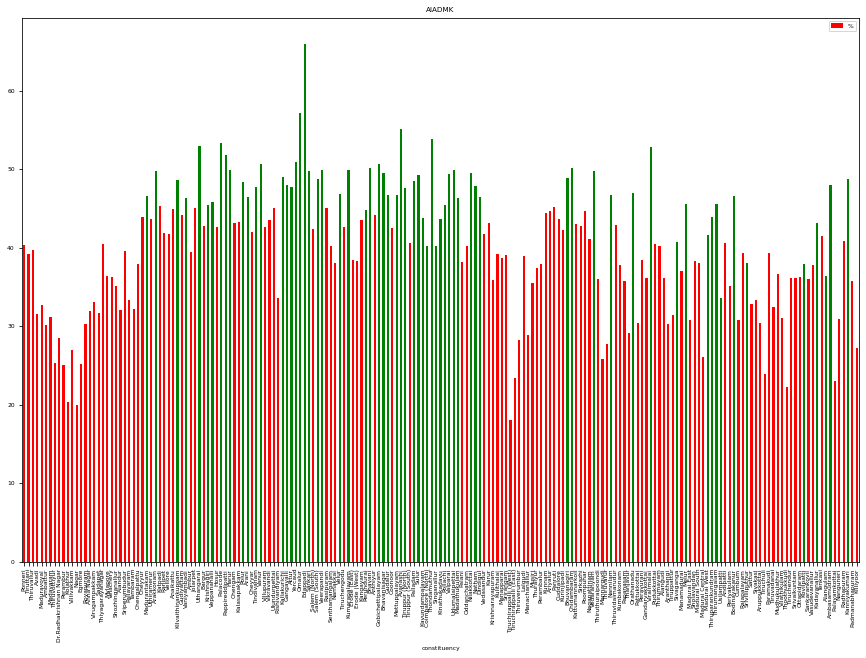

In [340]:
df_admk.plot(x="constituency", y="%", kind="bar",color=df_admk['result'].replace({1: "green", 0: "red"}), title='AIADMK', figsize=(15, 10))

In [341]:
df_admk[df_admk['%']>45]

,constituency,Total votes,%,All party votes,result
28,Madurantakam,86646,46.62,185842,1
30,Arakkonam,85399,49.82,171412,1
31,Katpadi,84394,45.31,186246,0
35,Kilvaithinankuppam,84579,48.57,174124,1
37,Vaniyambadi,88018,46.33,189997,1
39,Jolarpet,88399,45.02,196358,0
40,Uthangarai,99675,52.96,188223,1
42,Krishnagiri,96050,45.38,211648,1
43,Veppanahalli,94104,45.87,205141,1
45,Palacode,110070,53.28,206595,1


In [342]:
df_admk[df_admk.result == 1]

,constituency,Total votes,%,All party votes,result
28,Madurantakam,86646,46.62,185842,1
30,Arakkonam,85399,49.82,171412,1
35,Kilvaithinankuppam,84579,48.57,174124,1
37,Vaniyambadi,88018,46.33,189997,1
40,Uthangarai,99675,52.96,188223,1
...,...,...,...,...,...
178,Kovilpatti,68556,37.89,180928,1
181,Kadayanallur,88474,43.08,205374,1
183,Alangulam,74153,36.44,203478,1
184,Ambasamudram,85211,47.96,177681,1


# DMK

In [343]:
df_dmk = get_data('Dravida Munnetra Kazhagam')

100%|████████████████████████████████████████████████████████████████████████████████| 234/234 [00:30<00:00,  7.77it/s]


In [344]:
df_dmk.describe()

,Total votes,%,All party votes,result
count,188.000000,188.000000,188.000000,188.000000
mean,92712.111702,46.673777,199591.553191,0.707447
std,19300.722361,6.783023,34461.642019,0.456150
min,56035.000000,28.040000,101650.000000,0.000000
25%,78803.000000,42.810000,179456.500000,0.000000
50%,90883.500000,46.425000,198613.500000,1.000000
75%,102727.750000,50.650000,214543.750000,1.000000
max,171558.000000,72.110000,388355.000000,1.000000


In [345]:
df_dmk.result.sum()

133

In [346]:
vote_per = 100*df_dmk["Total votes"].sum()/df_dmk['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 46.451 %


<AxesSubplot:title={'center':'DMK'}, xlabel='constituency'>

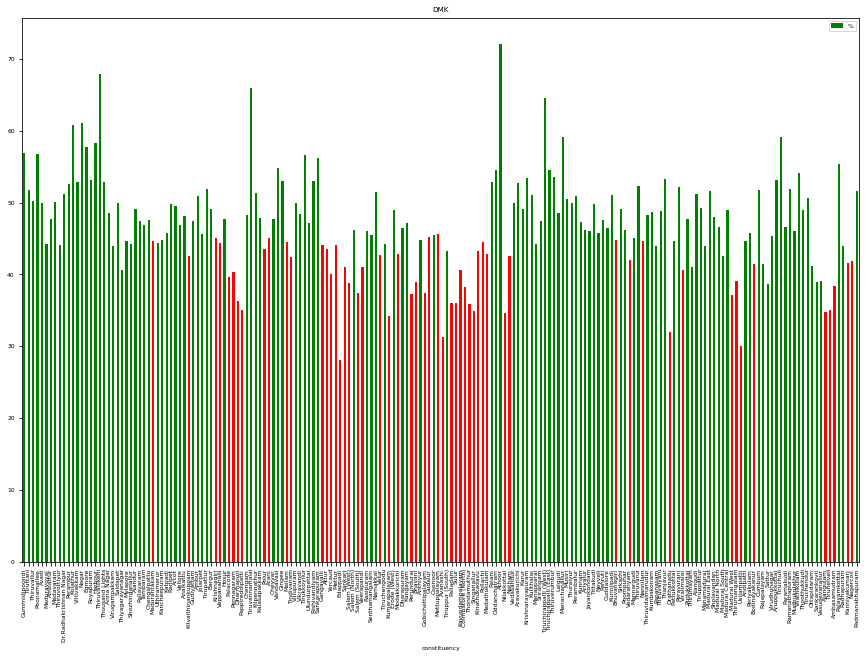

In [347]:
df_dmk.plot(x="constituency", y="%", kind="bar",color=df_dmk['result'].replace({1: "green", 0: "red"}), title='DMK', figsize=(15, 10))

In [348]:
df_dmk[df_dmk['%']>42]

,constituency,Total votes,%,All party votes,result
0,Gummidipoondi,126452,56.94,222069,1
1,Tiruttani,120314,51.72,232624,1
2,Thiruvallur,107709,50.27,214243,1
3,Poonamallee,149578,56.72,263736,1
4,Avadi,150287,49.94,300927,1
...,...,...,...,...,...
175,Thoothukkudi,92314,49.00,188407,1
176,Tiruchendur,88274,50.58,174536,1
183,Palayamkottai,89117,55.32,161091,1
184,Radhapuram,82331,43.95,187310,1


In [349]:
df_dmk[df_dmk.result == 1]

,constituency,Total votes,%,All party votes,result
0,Gummidipoondi,126452,56.94,222069,1
1,Tiruttani,120314,51.72,232624,1
2,Thiruvallur,107709,50.27,214243,1
3,Poonamallee,149578,56.72,263736,1
4,Avadi,150287,49.94,300927,1
...,...,...,...,...,...
178,Sankarankovil,71347,38.92,183338,1
179,Vasudevanallur,68730,39.08,175881,1
183,Palayamkottai,89117,55.32,161091,1
184,Radhapuram,82331,43.95,187310,1


# NTK

In [350]:
df_ntk = get_data('Naam Tamilar Katchi')

100%|████████████████████████████████████████████████████████████████████████████████| 234/234 [00:38<00:00,  6.04it/s]


In [351]:
df_ntk.describe()

,Total votes,%,All party votes,result
count,234.000000,234.000000,234.000000,234.0
mean,12999.764957,6.567735,197591.846154,0.0
std,5619.360662,2.458838,33494.288582,0.0
min,3357.000000,1.950000,101650.000000,0.0
25%,9585.500000,4.992500,177720.750000,0.0
50%,11606.500000,6.055000,197031.000000,0.0
75%,14986.000000,7.767500,213843.500000,0.0
max,48597.000000,24.300000,388355.000000,0.0


In [352]:
df_ntk.result.sum()

0

In [353]:
df_ntk["Total votes"].sum()

3041945

In [354]:
df_ntk['All party votes'].sum()

46236492

In [355]:
vote_per = 100*df_ntk["Total votes"].sum()/df_ntk['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 6.579 %


<AxesSubplot:title={'center':'NTK'}, xlabel='constituency'>

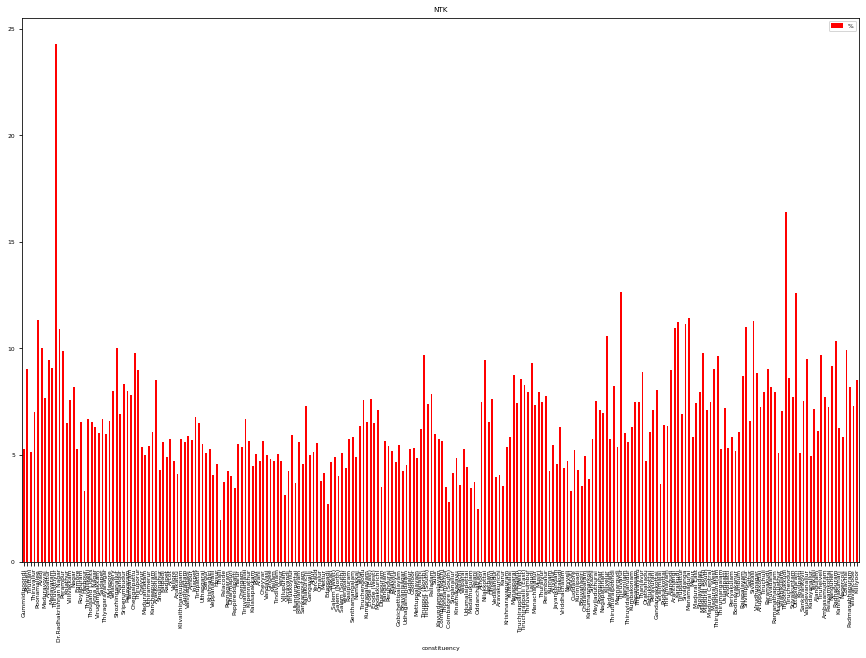

In [356]:
df_ntk.plot(x="constituency", y="%", kind="bar",color=df_ntk['result'].replace({1: "green", 0: "red"}), title='NTK', figsize=(15, 10))

In [357]:
df_ntk[df_ntk['%']>10]#.count()

,constituency,Total votes,%,All party votes,result
4,Poonamallee,29871,11.33,263736,0
9,Thiruvottiyur,48597,24.30,199996,0
10,Dr.Radhakrishnan Nagar,20437,10.93,187027,0
26,Shozhinganallur,38872,10.01,388355,0
163,Kilvelur,15173,10.61,142995,0
167,Thiruvarur,26300,12.63,208290,0
182,Aranthangi,18460,10.98,168048,0
183,Karaikudi,23872,11.24,212456,0
185,Sivaganga,22500,11.14,202044,0
186,Manamadurai,23228,11.44,203061,0


In [358]:
df_ntk[df_ntk['%']<3]

,constituency,Total votes,%,All party votes,result
55,Thalli,3776,1.95,194022,0
85,Edappadi,6626,2.68,247301,0
119,Coimbatore (South),4300,2.78,154765,0
127,Oddanchatram,4944,2.45,201756,0


In [359]:
df_ntk[df_ntk.result == 1]

,constituency,Total votes,%,All party votes,result


# MNM

In [360]:
df_mnm = get_data('Makkal Needhi Maiam')

100%|████████████████████████████████████████████████████████████████████████████████| 234/234 [00:30<00:00,  7.67it/s]


In [361]:
df_mnm.describe()

,Total votes,%,All party votes,result
count,180.000000,180.000000,180.000000,180.0
mean,6723.938889,3.438500,196256.561111,0.0
std,7469.065389,3.885519,35888.853211,0.0
min,437.000000,0.280000,101650.000000,0.0
25%,1967.250000,1.017500,176259.000000,0.0
50%,3582.000000,1.975000,194988.500000,0.0
75%,9766.000000,5.030000,211850.000000,0.0
max,51481.000000,33.260000,388355.000000,0.0


In [362]:
df_mnm.result.sum()

0

In [363]:
vote_per = 100*df_mnm["Total votes"].sum()/df_mnm['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 3.426 %


<AxesSubplot:title={'center':'MNM'}, xlabel='constituency'>

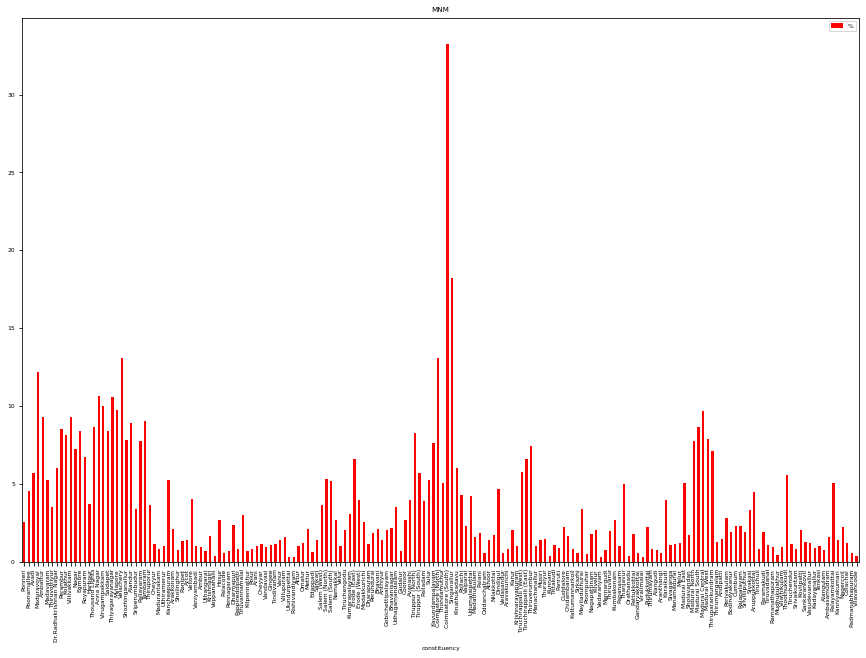

In [364]:
df_mnm.plot(x="constituency", y="%", kind="bar",color=df_mnm['result'].replace({1: "green", 0: "red"}), title='MNM', figsize=(15, 10))

In [365]:
tmp = df_mnm[-60:]
tmp[tmp['%']>5]

,constituency,Total votes,%,All party votes,result
142,Madurai East,11993,5.04,237892,0
144,Madurai North,12102,7.73,156556,0
145,Madurai South,12821,8.67,147833,0
146,Madurai Central,14495,9.70,149430,0
147,Madurai West,15849,7.86,201694,0
148,Thiruparankundram,16750,7.10,235849,0
164,Thoothukkudi,10534,5.59,188407,0
174,Palayamkottai,8107,5.03,161091,0


In [366]:
tmp = df_mnm[-120:-60]
tmp[tmp['%']>5]

,constituency,Total votes,%,All party votes,result
65,Salem (North),10718,5.30,202376,0
66,Salem (South),10368,5.18,199982,0
71,Erode (East),10005,6.58,152037,0
84,Tiruppur (North),19602,8.23,238092,0
85,Tiruppur (South),9934,5.70,174418,0
87,Sulur,12658,5.24,241653,0
88,Kavundampalayam,23527,7.59,309918,0
89,Coimbatore (North),26503,13.07,202799,0
90,Thondamuthur,11606,5.03,230531,0
91,Coimbatore (South),51481,33.26,154765,0


In [367]:
tmp = df_mnm[:-120]
tmp[tmp['%']>5]

,constituency,Total votes,%,All party votes,result
2,Avadi,17092,5.68,300927,0
3,Maduravoyal,33401,12.20,273870,0
4,Ambattur,22370,9.31,240299,0
5,Madavaram,15877,5.25,302700,0
7,Dr.Radhakrishnan Nagar,11198,5.99,187027,0
8,Perambur,17072,8.52,200387,0
9,Kolathur,14076,8.12,173388,0
10,Villivakkam,13364,9.27,144092,0
11,Nagar,9710,7.26,133696,0
12,Egmore,9990,8.38,119271,0


In [368]:
df_mnm[df_mnm['%']>10].count()

constituency       8
Total votes        8
%                  8
All party votes    8
result             8
dtype: int64

In [369]:
df_mnm[df_mnm['%']<1].count()

constituency       42
Total votes        42
%                  42
All party votes    42
result             42
dtype: int64

In [370]:
df_mnm[df_mnm.result == 1]

,constituency,Total votes,%,All party votes,result


# AMMK

In [372]:
df_ammk = get_data('Amma Makkal Munnettra Kazagam')

100%|████████████████████████████████████████████████████████████████████████████████| 234/234 [00:34<00:00,  6.74it/s]


In [373]:
df_ammk.describe()

,Total votes,%,All party votes,result
count,165.000000,165.000000,165.000000,165.0
mean,6581.490909,3.342182,197708.484848,0.0
std,10095.077458,5.122261,31583.261186,0.0
min,346.000000,0.180000,101650.000000,0.0
25%,1284.000000,0.720000,177200.000000,0.0
50%,2435.000000,1.160000,197784.000000,0.0
75%,7104.000000,3.430000,214108.000000,0.0
max,56153.000000,31.040000,309918.000000,0.0


In [374]:
df_ammk.result.sum()

0

In [375]:
vote_per = 100*df_ammk["Total votes"].sum()/df_ammk['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 3.329 %


<AxesSubplot:title={'center':'AMMK'}, xlabel='constituency'>

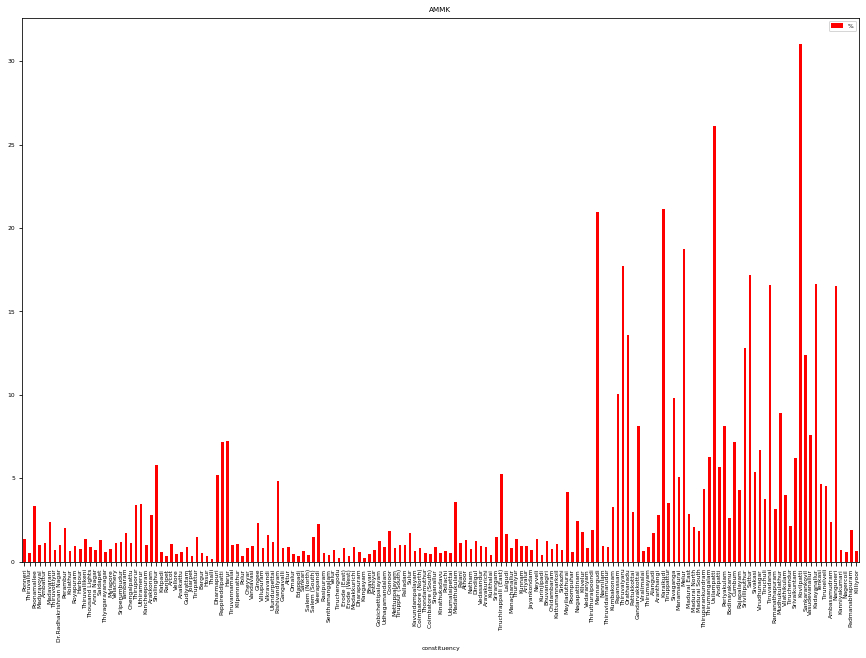

In [376]:
df_ammk.plot(x="constituency", y="%", kind="bar",color=df_ammk['result'].replace({1: "green", 0: "red"}), title='AMMK', figsize=(15, 10))

In [377]:
tmp = df_ammk[-60:]
tmp[tmp['%']>15]

,constituency,Total votes,%,All party votes,result
113,Mannargudi,40481,20.95,193229,0
118,Thiruvaiyaru,37469,17.72,211430,0
126,Karaikudi,44864,21.12,212456,0
130,Melur,34262,18.74,182782,0
136,Usilampatti,55491,26.11,212513,0
143,Sattur,32916,17.16,191783,0
147,Tiruvadanai,33426,16.56,201815,0
153,Kovilpatti,56153,31.04,180928,0
156,Kadayanallur,34216,16.66,205374,0
160,Nanguneri,31870,16.55,192522,0


In [378]:
df_ammk[df_ammk['%']>10].count()

constituency       14
Total votes        14
%                  14
All party votes    14
result             14
dtype: int64

In [379]:
df_ammk[df_ammk['%']>2].count()

constituency       59
Total votes        59
%                  59
All party votes    59
result             59
dtype: int64

In [380]:
df_ammk[df_ammk.result == 1]

,constituency,Total votes,%,All party votes,result


# DMDK

In [381]:
df_dmdk = get_data('Desiya Murpokku Dravida Kazhagam')

100%|████████████████████████████████████████████████████████████████████████████████| 234/234 [00:27<00:00,  8.42it/s]


In [382]:
df_dmdk.describe()

,Total votes,%,All party votes,result
count,60.000000,60.000000,60.000000,60.0
mean,3335.933333,1.691000,197993.433333,0.0
std,3654.675176,1.834567,39322.257372,0.0
min,858.000000,0.450000,119271.000000,0.0
25%,1842.500000,0.947500,179559.500000,0.0
50%,2554.000000,1.230000,195538.000000,0.0
75%,3586.750000,1.710000,210885.500000,0.0
max,25908.000000,13.170000,388355.000000,0.0


In [383]:
vote_per = 100*df_dmdk["Total votes"].sum()/df_dmdk['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 1.685 %


<AxesSubplot:title={'center':'DMDK'}, xlabel='constituency'>

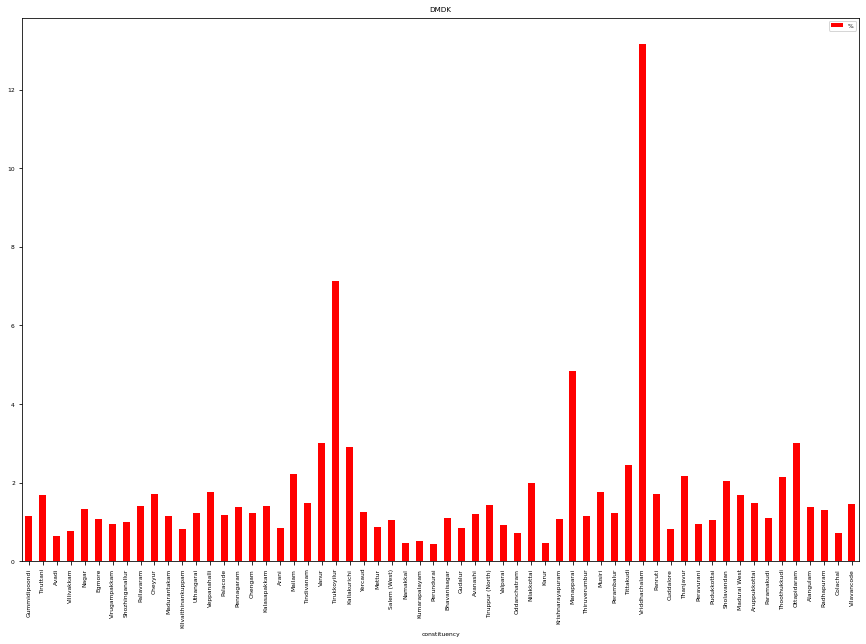

In [384]:
df_dmdk.plot(x="constituency", y="%", kind="bar",color=df_dmdk['result'].replace({1: "green", 0: "red"}), title='DMDK', figsize=(15, 10))

In [385]:
df_dmdk[df_dmdk['%']>10]

,constituency,Total votes,%,All party votes,result
44,Vriddhachalam,25908,13.17,196734,0


In [386]:
df_dmdk[df_dmdk.result == 1]

,constituency,Total votes,%,All party votes,result


# INC

In [387]:
df_inc = get_data('Indian National Congress')

100%|████████████████████████████████████████████████████████████████████████████████| 234/234 [00:26<00:00,  8.99it/s]


In [388]:
df_inc.describe()

,Total votes,%,All party votes,result
count,25.000000,25.000000,25.000000,25.000000
mean,79061.080000,41.531600,191164.360000,0.720000
std,16797.519264,7.552336,29437.004678,0.458258
min,42383.000000,26.360000,141102.000000,0.000000
25%,71288.000000,37.870000,169918.000000,0.000000
50%,77064.000000,41.710000,185047.000000,1.000000
75%,87473.000000,46.440000,210354.000000,1.000000
max,115353.000000,59.760000,264262.000000,1.000000


In [389]:
df_inc.result.sum()

18

In [390]:
vote_per = 100*df_inc["Total votes"].sum()/df_inc['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 41.358 %


<AxesSubplot:title={'center':'INC'}, xlabel='constituency'>

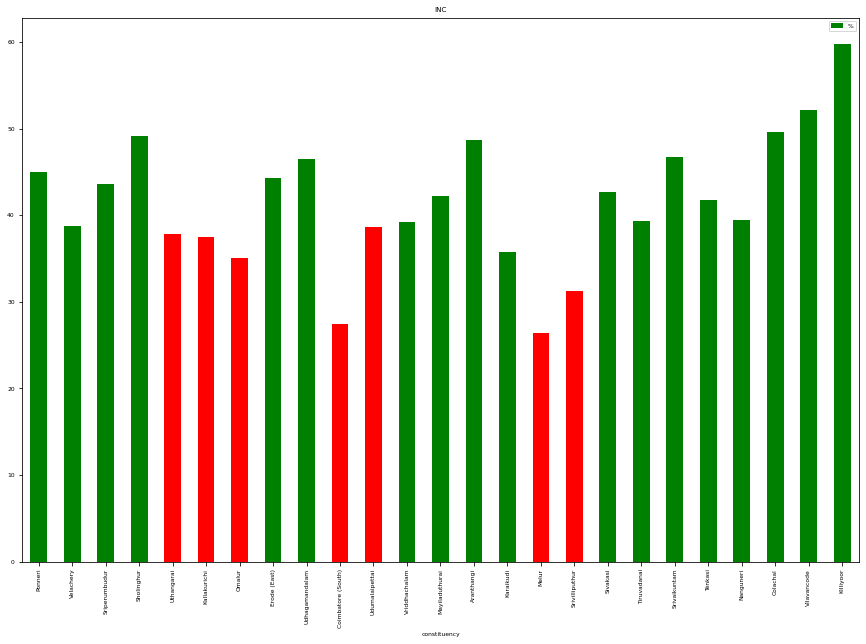

In [391]:
df_inc.plot(x="constituency", y="%", kind="bar",color=df_inc['result'].replace({1: "green", 0: "red"}), title='INC', figsize=(15, 10))

In [392]:
df_inc[df_inc['%']>43]

,constituency,Total votes,%,All party votes,result
0,Ponneri,94528,44.94,210354,1
2,Sriperumbudur,115353,43.65,264262,1
3,Sholinghur,110228,49.18,224109,1
7,Erode (East),67300,44.27,152037,1
8,Udhagamandalam,65530,46.44,141102,1
13,Aranthangi,81835,48.70,168048,1
19,Srivaikuntam,76843,46.75,164386,1
22,Colachal,90681,49.56,182969,1
23,Vilavancode,87473,52.12,167836,1
24,Killiyoor,101541,59.76,169918,1


In [393]:
df_inc[df_inc.result == 1]

,constituency,Total votes,%,All party votes,result
0,Ponneri,94528,44.94,210354,1
1,Velachery,68493,38.76,176714,1
2,Sriperumbudur,115353,43.65,264262,1
3,Sholinghur,110228,49.18,224109,1
7,Erode (East),67300,44.27,152037,1
8,Udhagamandalam,65530,46.44,141102,1
11,Vriddhachalam,77064,39.17,196734,1
12,Mayiladuthurai,73642,42.17,174640,1
13,Aranthangi,81835,48.70,168048,1
14,Karaikudi,75954,35.75,212456,1


# PMK

In [394]:
df_pmk = get_data('Pattali Makkal Katchi')

100%|████████████████████████████████████████████████████████████████████████████████| 234/234 [00:29<00:00,  7.85it/s]


In [395]:
df_pmk.result.sum()

5

In [396]:
vote_per = 100*df_pmk["Total votes"].sum()/df_pmk['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 37.611 %


<AxesSubplot:title={'center':'PMK'}, xlabel='constituency'>

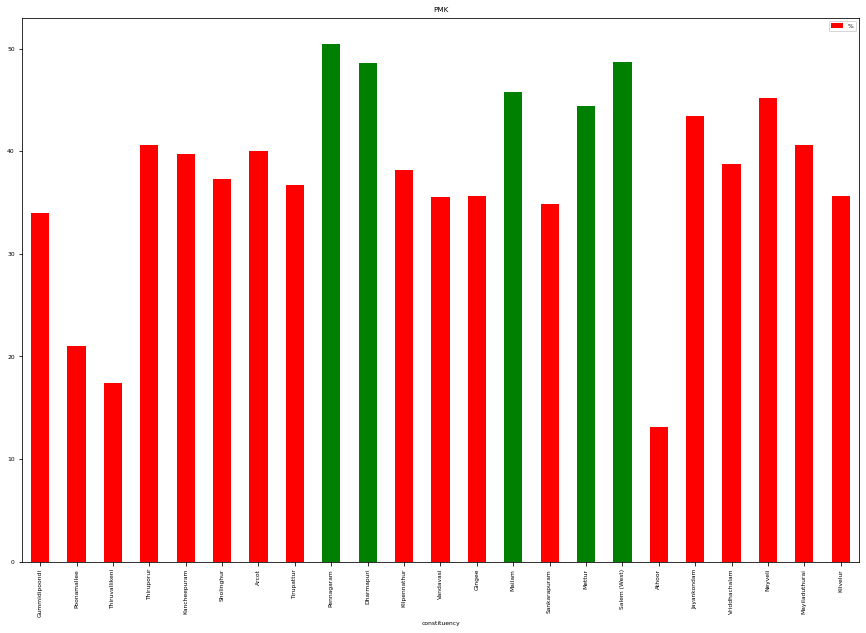

In [397]:
df_pmk.plot(x="constituency", y="%", kind="bar",color=df_pmk['result'].replace({1: "green", 0: "red"}), title='PMK', figsize=(15, 10))

In [398]:
df_pmk[df_pmk.result == 1]

,constituency,Total votes,%,All party votes,result
8,Pennagaram,106123,50.46,210305,1
9,Dharmapuri,105630,48.60,217333,1
13,Mailam,81044,45.79,176989,1
15,Mettur,97055,44.43,218442,1
16,Salem (West),105483,48.69,216628,1


# VCK

In [399]:
df_vck = get_data('Viduthalai Chiruthaigal Katchi')

100%|████████████████████████████████████████████████████████████████████████████████| 234/234 [00:30<00:00,  7.75it/s]


In [400]:
df_vck.result.sum()

4

In [401]:
vote_per = 100*df_vck["Total votes"].sum()/df_vck['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 42.441 %


<AxesSubplot:title={'center':'VCK'}, xlabel='constituency'>

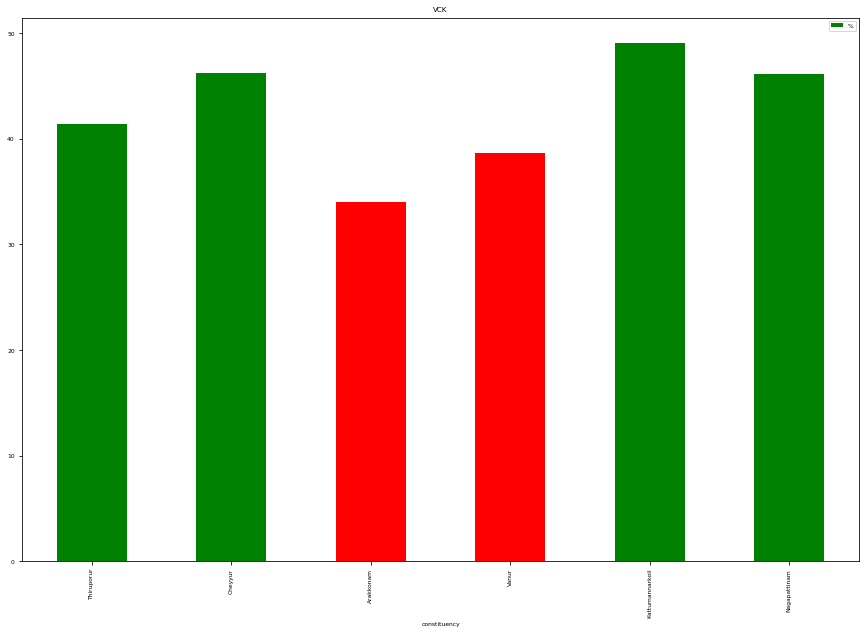

In [402]:
df_vck.plot(x="constituency", y="%", kind="bar",color=df_vck['result'].replace({1: "green", 0: "red"}), title='VCK', figsize=(15, 10))

In [403]:
df_vck[df_vck.result == 1]

,constituency,Total votes,%,All party votes,result
0,Thiruporur,93954,41.44,226729,1
1,Cheyyur,82750,46.20,179120,1
4,Kattumannarkoil,86056,49.02,175561,1
5,Nagapattinam,66281,46.17,143560,1


# BJP

In [404]:
df_bjp = get_data('Bharatiya Janata Party')

100%|████████████████████████████████████████████████████████████████████████████████| 234/234 [00:28<00:00,  8.22it/s]


In [405]:
df_bjp.result.sum()

4

In [406]:
vote_per = 100*df_bjp["Total votes"].sum()/df_bjp['All party votes'].sum()
print('Overall vote percentage = {0:.3f} %'.format(vote_per))

Overall vote percentage = 34.256 %


<AxesSubplot:title={'center':'BJP'}, xlabel='constituency'>

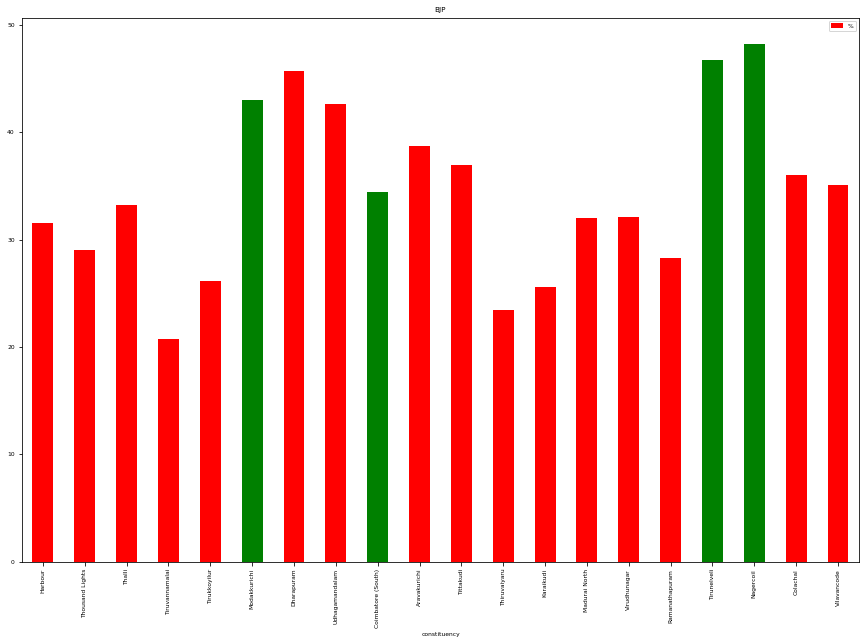

In [407]:
df_bjp.plot(x="constituency", y="%", kind="bar",color=df_bjp['result'].replace({1: "green", 0: "red"}), title='BJP', figsize=(15, 10))

In [408]:
df_bjp[df_bjp.result == 1]

,constituency,Total votes,%,All party votes,result
5,Modakkurichi,78125,42.96,181857,1
8,Coimbatore (South),53209,34.38,154765,1
16,Tirunelveli,92282,46.70,197587,1
17,Nagercoil,88804,48.21,184185,1
